### Programming for Biomedical Informatics
#### Week 2 - FTP Bulk Download & APIs

This week we're going to practice using bulk download and API in a practical example. This week we are going to be looking at a resource called GenCC - The Gene Curation Collection - https://thegencc.org

GenCC is primarily focussed on providing a unified source of gene-disease relationships that is harmonised across the various international efforts that operate in this space. In the process of doing so they are establishing standards for curation and annotation to maximise the consitency and useability of their data.

Our efforts today will focus on a full FTP download of the GenCC data, some parsing, and use of the API at Bioportal to gather more information about some of the elements of the GenCC data. This is a **slightly** contrived example, but hopefully it is both interesting and useful to give you an idea of how these two approaches can be used together.

In [7]:
import pandas as pd
import urllib.request
from prettytable import PrettyTable

In [8]:
# Step One - Bulk Download of GenCC data

'''The url to the latest version of the data is here - https://search.thegencc.org/download/action/submissions-export-tsv'''

#pseudocode 1 - download the data using the urllib library
data = urllib.request.urlopen('https://search.thegencc.org/download/action/submissions-export-tsv')

#pseudocode 2 - read the data into a pandas dataframe *you can see from the url that the data is tab separated*
data = pd.read_csv(data, sep='\t')

#pseudocode 3 - look ay the first few rows of the dataframe
print(data.head())


                                                uuid  gene_curie gene_symbol  \
0  GENCC_000101-HGNC_10896-OMIM_182212-HP_0000006...  HGNC:10896         SKI   
1  GENCC_000101-HGNC_16636-OMIM_171300-HP_0000006...  HGNC:16636       KIF1B   
2  GENCC_000101-HGNC_16636-OMIM_118210-HP_0000006...  HGNC:16636       KIF1B   
3  GENCC_000101-HGNC_17939-OMIM_617532-HP_0000007...  HGNC:17939     SLC45A1   
4  GENCC_000101-HGNC_11071-OMIM_616291-HP_0000007...  HGNC:11071      SLC9A1   

   disease_curie                                      disease_title  \
0  MONDO:0008426                       Shprintzen-Goldberg syndrome   
1  MONDO:0008233                                   pheochromocytoma   
2  MONDO:0007308               Charcot-Marie-Tooth disease type 2A1   
3  MONDO:0044322  intellectual developmental disorder with neuro...   
4  MONDO:0014572                        Lichtenstein-Knorr syndrome   

  disease_original_curie disease_original_title classification_curie  \
0            OMIM:18

                                                    uuid  gene_curie  \
disease_title                                                          
2-aminoadipic 2-oxoadipic aciduria                     1           1   
lethal fetal cerebrorenogenitourinary agenesis/...     1           1   
leukodystrophy, hypomyelinating, 26, with chond...     1           1   
leukodystrophy, hypomyelinating, 25                    1           1   
leukodystrophy, hypomyelinating, 24                    1           1   

                                                    gene_symbol  \
disease_title                                                     
2-aminoadipic 2-oxoadipic aciduria                            1   
lethal fetal cerebrorenogenitourinary agenesis/...            1   
leukodystrophy, hypomyelinating, 26, with chond...            1   
leukodystrophy, hypomyelinating, 25                           1   
leukodystrophy, hypomyelinating, 24                           1   

                         

<Axes: xlabel='Number of Genes', ylabel='Disease Name'>

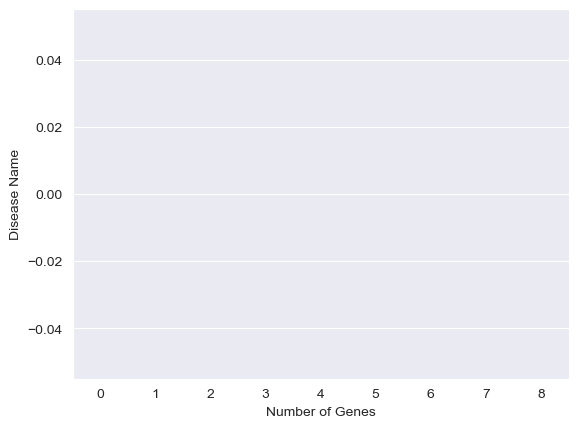

In [10]:
# Step Two - Gene Counts by Disease

'''Now we want a summary of how many genes have been annotated to each disease.'''

#pseudocode 4 - group the data by disease and count the number of genes for each disease (think of the pandas function that does this)
data = data.groupby('disease_title').count()

#pseudocode 5 - sort the data in descending order
data = data.sort_values('uuid', ascending=False)

#pseudocode 6 - look at the first few rows of the dataframe
print(data.head())

'''There's a nice package called PrettyTable that can be used to print the data in a nice table format. You can install it using 'conda install prettytable'''

#make some simple two-column data
data2 = [['disease1', 1000], ['disease2', 2000], ['disease3', 3000], ['disease4', 4000], ['disease5', 5000]]

# create a table
table = PrettyTable()

# add the columns
table.field_names = ['Disease Name','Number of Genes']

# add the rows
for row in data2:
    table.add_row(row)

# print the table
print(table)

# pseudocode 7 - create a table using the PrettyTable package
gene_counts_table = PrettyTable()
gene_counts_table.field_names = ['Disease Name','Number of Genes']
for index, row in data.iterrows():
    gene_counts_table.add_row([index, row['uuid']])
print(gene_counts_table)

'''There is a very nice plotting package called seaborn that can be used to create plots. You can install it using 'conda install seaborn.
Here's an example of how to create a horizontal bar chart using seaborn'''

#plot a horizontal bar chart of the data
import seaborn as sns
import pandas as pd

# set the style
sns.set_style('darkgrid')

# plot the data
sns.barplot(x='Number of Genes', y='Disease Name', data=pd.DataFrame(data, columns=['Disease Name', 'Number of Genes']))

#pseudocode 8 - plot the 10 diseases with the most genes
sns.barplot(x='Number of Genes', y='Disease Name', data=pd.DataFrame(data.head(10), columns=['Disease Name', 'Number of Genes']))

In [ ]:
# Step Three - Gene-Disease Confidence

'''When making decisions about gene disease relationships there are a complex set of criteria. The result is a categorical set of keywords that describe the confidence
of assertions. These are stored in the 'classification_title field of the original data'''

#pseudocode 9 - group the data by classification_title (confidence categories) and count the number of genes for each
'''###YOUR CODE HERE###'''

#pseudocode 10 - sort the data in descending order
'''###YOUR CODE HERE###'''

#pseudocode 11 - look at the first few rows of the dataframe
'''###YOUR CODE HERE###'''

#pseudocode 12 - create a table using the PrettyTable package
'''###YOUR CODE HERE###'''

#pseudocode 13 - plot the classification_titles with the most genes
'''###YOUR CODE HERE###'''

In [ ]:
# Step Four - Modes of Inheritance

'''Many of these diseases are Mendelian diseases. This means that they are caused by a mutation in a single gene. These mutations are inherited in a particular way.
GenCC captures this information in the 'moi_curie' field'''

#pseudocode 14 - group the data by moi_curie (modes of inheritance) and count the number of genes for each
'''###YOUR CODE HERE###'''

'''This is good but the values we have here are accession ids that aren't very informative
We know that terms (classes) like 'HP:0000006' are actually from the Human Phenotype Ontology (HPO)
We're  going to use the BioPortal API to get infromation about these classes and then finish by merging these data with our table'''


In [ ]:
'''first we need an API key from BioPortal. You can create an account on BioPortal for free and get an API key.
https://bioportal.bioontology.org/
For this example I will use my API key - note how I have it stored in a file in a separate folder and exclude this from the git repository'''

#load my API key for BioPortal
with open("../api_keys/bioportal.txt", "r") as file:
    apikey = file.read().strip()

'''Here is an example of how you can use the requests library to get information from the BioPortal API'''

#find details for an ontology term using the BioPortal API
import requests
import json

#set the URL for the BioPortal API - here we query with a fixed HP class id
url = 'http://data.bioontology.org/ontologies/HP/classes/HP:0000006?apikey='+apikey

#send the request
response = requests.get(url)

#parse the JSON in the response
class_info = response.json()

#display the JSON (for interest!)
print(json.dumps(class_info, indent=2))

#display the keys in the JSON (for interest!)
print(class_info.keys())

#display the values for the keys
print(class_info['@id'],class_info['prefLabel'])
print(class_info['definition'][0])

In [ ]:
#pseudocode 15 - using the unique accession ids in the moi_curie field, get the names of the classes from the BioPortal API by modifying the code above
'''###YOUR CODE HERE###'''

#pseudocode 16 - merge the data with the moi_curie field with the data from the BioPortal API so now we have a dataframe that contains
# the mode of inheritance and the number of genes for each and the name of the mode of inheritance (don't put the definition in the table as it's too long)
'''###YOUR CODE HERE###'''

#### Well done!
#### You've now practised FTP download, API use and also completed some data manipulation using Pandas, PrettyTable, and plotting with Seaborn